# Classification

importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## merging datasets

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/VJTI /dataset/dataset/htmlDataset_withoutFilename.csv")
data.head()
print(data.shape)

(6016, 32)


In [ ]:
data.head()

,url_length,num_dots_in_url,num_special_chars,num_subdomains,num_forms,num_inputs,num_password_fields,num_external_links,num_internal_links,num_hidden_fields,...,num_iframes,num_hidden_iframes,num_images,num_images_with_suspicious_url,num_style_tags,num_inline_styles,num_onload_attributes,num_onerror_attributes,num_external_form_actions,label
0,7032,12,52,11,0,0,0,2,0,0,...,0,0,1,0,1,4,0,0,0,0
1,23676,205,1192,204,0,2,0,3,65,0,...,0,0,28,1,0,40,0,0,0,0
2,154373,935,5468,934,1,11,0,29,316,7,...,2,0,107,1,1,39,0,0,0,0
3,44520,721,1657,720,1,4,0,7,55,3,...,0,0,30,1,2,18,0,0,0,0
4,18307,322,760,321,0,1,0,37,0,0,...,1,0,36,1,0,8,0,0,0,0


In [ ]:
data.isnull().sum()

,0
url_length,0
num_dots_in_url,0
num_special_chars,0
num_subdomains,0
num_forms,0
num_inputs,0
num_password_fields,0
num_external_links,0
num_internal_links,0
num_hidden_fields,0


In [ ]:
data.head()

,url_length,num_dots_in_url,num_special_chars,num_subdomains,num_forms,num_inputs,num_password_fields,num_external_links,num_internal_links,num_hidden_fields,...,num_iframes,num_hidden_iframes,num_images,num_images_with_suspicious_url,num_style_tags,num_inline_styles,num_onload_attributes,num_onerror_attributes,num_external_form_actions,label
0,7032,12,52,11,0,0,0,2,0,0,...,0,0,1,0,1,4,0,0,0,0
1,23676,205,1192,204,0,2,0,3,65,0,...,0,0,28,1,0,40,0,0,0,0
2,154373,935,5468,934,1,11,0,29,316,7,...,2,0,107,1,1,39,0,0,0,0
3,44520,721,1657,720,1,4,0,7,55,3,...,0,0,30,1,2,18,0,0,0,0
4,18307,322,760,321,0,1,0,37,0,0,...,1,0,36,1,0,8,0,0,0,0


In [ ]:
count_zeros = (data['label'] == 0).sum()
print("Number of rows with '0' in 'result' column:", count_zeros)


Number of rows with '0' in 'result' column: 4282


In [ ]:
count_ones = (data['label'] == 1).sum()
print("Number of rows with '1' in 'result' column:", count_ones)

Number of rows with '1' in 'result' column: 1734


In [ ]:
print(data.columns)
print(data.shape)

Index(['url_length', 'num_dots_in_url', 'num_special_chars', 'num_subdomains',
       'num_forms', 'num_inputs', 'num_password_fields', 'num_external_links',
       'num_internal_links', 'num_hidden_fields', 'num_mailto_links',
       'num_scripts', 'num_js_functions', 'has_eval_js', 'has_escape_js',
       'has_unescape_js', 'has_settimeout_js', 'has_setinterval_js',
       'has_https', 'suspicious_url', 'num_meta_tags', 'num_refresh_meta',
       'num_iframes', 'num_hidden_iframes', 'num_images',
       'num_images_with_suspicious_url', 'num_style_tags', 'num_inline_styles',
       'num_onload_attributes', 'num_onerror_attributes',
       'num_external_form_actions', 'label'],
      dtype='object')
(6016, 32)


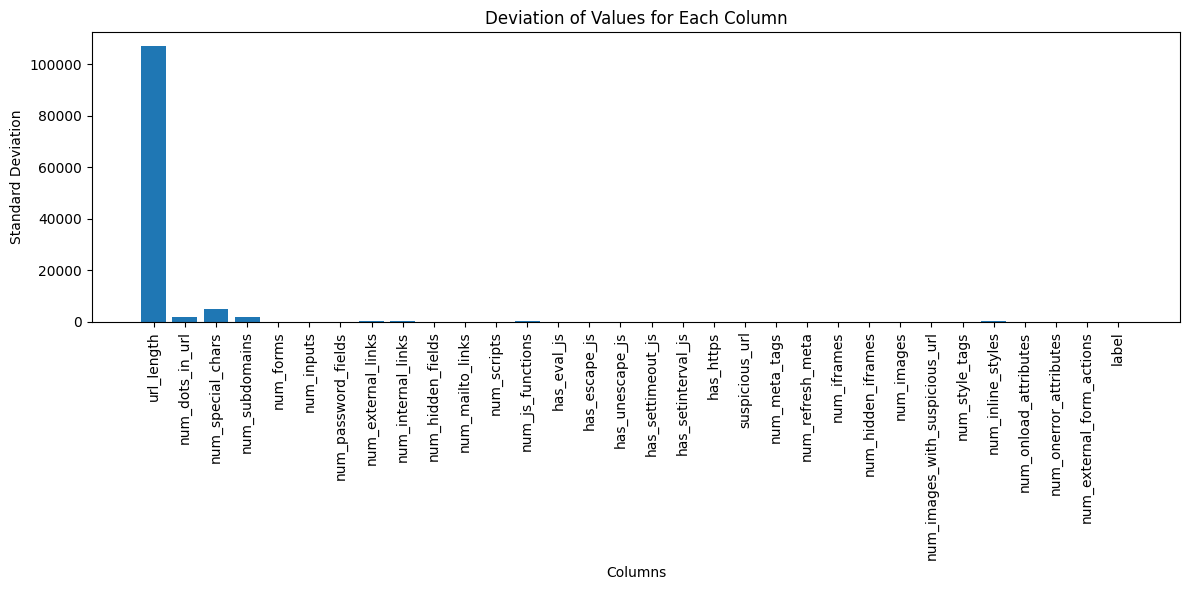

In [ ]:
means = data.mean()
stds = data.std()

plt.figure(figsize=(12, 6))
plt.bar(means.index, stds)
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.title('Deviation of Values for Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##Splitting the dataset and standardization

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
X.shape

(6016, 31)

In [ ]:
feature_names = X.columns
feature_names

Index(['url_length', 'num_dots_in_url', 'num_special_chars', 'num_subdomains',
       'num_forms', 'num_inputs', 'num_password_fields', 'num_external_links',
       'num_internal_links', 'num_hidden_fields', 'num_mailto_links',
       'num_scripts', 'num_js_functions', 'has_eval_js', 'has_escape_js',
       'has_unescape_js', 'has_settimeout_js', 'has_setinterval_js',
       'has_https', 'suspicious_url', 'num_meta_tags', 'num_refresh_meta',
       'num_iframes', 'num_hidden_iframes', 'num_images',
       'num_images_with_suspicious_url', 'num_style_tags', 'num_inline_styles',
       'num_onload_attributes', 'num_onerror_attributes',
       'num_external_form_actions'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_train_pred_logreg = logreg.predict(X_train)
y_test_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Test Accuracy:", accuracy_score(y_test,y_test_pred_logreg ))
print(confusion_matrix(y_test, y_test_pred_logreg))
print(classification_report(y_test, y_test_pred_logreg))

lr_train_acc = accuracy_score(y_train, y_train_pred_logreg)
lr_test_acc = accuracy_score(y_test, y_test_pred_logreg)
lr_f1 = f1_score(y_test, y_test_pred_logreg)
lr_precision = precision_score(y_test, y_test_pred_logreg)
lr_recall = recall_score(y_test, y_test_pred_logreg)
print("Logistic Regression Train Accuracy:", lr_train_acc)
print("Logistic Regression Test Accuracy:", lr_test_acc)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)

Logistic Regression Test Accuracy: 0.8646179401993356
[[776  88]
 [ 75 265]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       864
           1       0.75      0.78      0.76       340

    accuracy                           0.86      1204
   macro avg       0.83      0.84      0.83      1204
weighted avg       0.87      0.86      0.87      1204

Logistic Regression Train Accuracy: 0.8545303408146301
Logistic Regression Test Accuracy: 0.8646179401993356
Logistic Regression F1 Score: 0.7647907647907649
Logistic Regression Precision: 0.7507082152974505
Logistic Regression Recall: 0.7794117647058824


In [ ]:
importance_lr = np.abs(logreg.coef_[0])

#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)
rf_f1 = f1_score(y_test, y_test_pred_rf)
rf_precision = precision_score(y_test, y_test_pred_rf)
rf_recall = recall_score(y_test, y_test_pred_rf)
print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)

Random Forest Accuracy: 0.9501661129568106
[[847  17]
 [ 43 297]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       864
           1       0.95      0.87      0.91       340

    accuracy                           0.95      1204
   macro avg       0.95      0.93      0.94      1204
weighted avg       0.95      0.95      0.95      1204

Random Forest Train Accuracy: 0.99833748960931
Random Forest Test Accuracy: 0.9501661129568106
Random Forest F1 Score: 0.908256880733945
Random Forest Precision: 0.945859872611465
Random Forest Recall: 0.8735294117647059


In [ ]:
importance_rf =rf.feature_importances_

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print(confusion_matrix(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

knn_train_acc = accuracy_score(y_train, y_train_pred_knn)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)
knn_f1 = f1_score(y_test, y_test_pred_knn)
knn_precision = precision_score(y_test, y_test_pred_knn)
knn_recall = recall_score(y_test, y_test_pred_knn)

print("KNN Train Accuracy:", knn_train_acc)
print("KNN Test Accuracy:", knn_test_acc)
print("KNN F1 Score:", knn_f1)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)

KNN Accuracy: 0.8995016611295681
[[804  60]
 [ 61 279]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       864
           1       0.82      0.82      0.82       340

    accuracy                           0.90      1204
   macro avg       0.88      0.88      0.88      1204
weighted avg       0.90      0.90      0.90      1204

KNN Train Accuracy: 0.9256026600166251
KNN Test Accuracy: 0.8995016611295681
KNN F1 Score: 0.8217967599410899
KNN Precision: 0.8230088495575221
KNN Recall: 0.8205882352941176


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
importance_knn = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42).importances_mean

#Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print(confusion_matrix(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))


svm_train_acc = accuracy_score(y_train, y_train_pred_svm)
svm_test_acc = accuracy_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm)
svm_precision = precision_score(y_test, y_test_pred_svm)
svm_recall = recall_score(y_test, y_test_pred_svm)
print("SVM Train Accuracy:", svm_train_acc)
print("SVM Test Accuracy:", svm_test_acc)
print("SVM F1 Score:", svm_f1)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)

SVM Accuracy: 0.8654485049833887
[[768  96]
 [ 66 274]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       864
           1       0.74      0.81      0.77       340

    accuracy                           0.87      1204
   macro avg       0.83      0.85      0.84      1204
weighted avg       0.87      0.87      0.87      1204

SVM Train Accuracy: 0.8503740648379052
SVM Test Accuracy: 0.8654485049833887
SVM F1 Score: 0.7718309859154929
SVM Precision: 0.7405405405405405
SVM Recall: 0.8058823529411765


In [ ]:
importance_svm = np.abs(svm.coef_[0])

#Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print(confusion_matrix(y_test, y_test_pred_gb))
print(classification_report(y_test, y_test_pred_gb))


gb_train_acc = accuracy_score(y_train, y_train_pred_gb)
gb_test_acc = accuracy_score(y_test, y_test_pred_gb)
gb_f1 = f1_score(y_test, y_test_pred_gb)
gb_precision = precision_score(y_test, y_test_pred_gb)
gb_recall = recall_score(y_test, y_test_pred_gb)

print("Gradient Boosting Train Accuracy:", gb_train_acc)
print("Gradient Boosting Test Accuracy:", gb_test_acc)
print("Gradient Boosting F1 Score:", gb_f1)
print("Gradient Boosting Precision:", gb_precision)
print("Gradient Boosting Recall:", gb_recall)

Gradient Boosting Accuracy: 0.909468438538206
[[818  46]
 [ 63 277]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       864
           1       0.86      0.81      0.84       340

    accuracy                           0.91      1204
   macro avg       0.89      0.88      0.89      1204
weighted avg       0.91      0.91      0.91      1204

Gradient Boosting Train Accuracy: 0.9318370739817123
Gradient Boosting Test Accuracy: 0.909468438538206
Gradient Boosting F1 Score: 0.8355957767722475
Gradient Boosting Precision: 0.8575851393188855
Gradient Boosting Recall: 0.8147058823529412


In [ ]:
importance_gb = gb.feature_importances_

#XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print(confusion_matrix(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

xgb_train_acc = accuracy_score(y_train, y_train_pred_xgb)
xgb_test_acc = accuracy_score(y_test, y_test_pred_xgb)
xgb_f1 = f1_score(y_test, y_test_pred_xgb)
xgb_precision = precision_score(y_test, y_test_pred_xgb)
xgb_recall = recall_score(y_test, y_test_pred_xgb)
print("XGBoost Train Accuracy:", xgb_train_acc)
print("XGBoost Test Accuracy:", xgb_test_acc)
print("XGBoost F1 Score:", xgb_f1)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)

XGBoost Accuracy: 0.9410299003322259
[[834  30]
 [ 41 299]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       864
           1       0.91      0.88      0.89       340

    accuracy                           0.94      1204
   macro avg       0.93      0.92      0.93      1204
weighted avg       0.94      0.94      0.94      1204

XGBoost Train Accuracy: 0.9937655860349127
XGBoost Test Accuracy: 0.9410299003322259
XGBoost F1 Score: 0.8938714499252616
XGBoost Precision: 0.9088145896656535
XGBoost Recall: 0.8794117647058823


In [ ]:
importance_xgb = xgb_model.feature_importances_

#LightGBM

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_train_pred_lgb = lgb_model.predict(X_train)
y_test_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_test_pred_lgb))
print(confusion_matrix(y_test, y_test_pred_lgb))
print(classification_report(y_test, y_test_pred_lgb))

lgb_train_acc = accuracy_score(y_train, y_train_pred_lgb)
lgb_test_acc = accuracy_score(y_test, y_test_pred_lgb)
lgb_f1 = f1_score(y_test, y_test_pred_lgb)
lgb_precision = precision_score(y_test, y_test_pred_lgb)
lgb_recall = recall_score(y_test, y_test_pred_lgb)

print("LightGBM Train Accuracy:", lgb_train_acc)
print("LightGBM Test Accuracy:", lgb_test_acc)
print("LightGBM F1 Score:", lgb_f1)
print("LightGBM Precision:", lgb_precision)
print("LightGBM Recall:", lgb_recall)

[LightGBM] [Info] Number of positive: 1394, number of negative: 3418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2636
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289692 -> initscore=-0.896878
[LightGBM] [Info] Start training from score -0.896878
LightGBM Accuracy: 0.9418604651162791
[[834  30]
 [ 40 300]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       864
           1       0.91      0.88      0.90       340

    accuracy                           0.94      1204
   macro avg       0.93      0.92      0.93      1204
weighted avg       0.94      0.94      0.94      1204

LightGBM Train Accuracy: 0.9877389858686617
LightGBM Test

In [ ]:
importance_lgb = lgb_model.feature_importances_

#Catboost

In [ ]:
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

y_train_pred_cb = cat_model.predict(X_train)
y_test_pred_cb = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_test_pred_cb))
print(confusion_matrix(y_test, y_test_pred_cb))
print(classification_report(y_test, y_test_pred_cb))


cb_train_acc = accuracy_score(y_train, y_train_pred_cb)
cb_test_acc = accuracy_score(y_test, y_test_pred_cb)
cb_f1 = f1_score(y_test, y_test_pred_cb)
cb_precision = precision_score(y_test, y_test_pred_cb)
cb_recall = recall_score(y_test, y_test_pred_cb)

print("CatBoost Train Accuracy:", cb_train_acc)
print("CatBoost Test Accuracy:", cb_test_acc)
print("CatBoost F1 Score:", cb_f1)
print("CatBoost Precision:", cb_precision)
print("CatBoost Recall:", cb_recall)

CatBoost Accuracy: 0.9368770764119602
[[833  31]
 [ 45 295]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       864
           1       0.90      0.87      0.89       340

    accuracy                           0.94      1204
   macro avg       0.93      0.92      0.92      1204
weighted avg       0.94      0.94      0.94      1204

CatBoost Train Accuracy: 0.9781795511221946
CatBoost Test Accuracy: 0.9368770764119602
CatBoost F1 Score: 0.885885885885886
CatBoost Precision: 0.9049079754601227
CatBoost Recall: 0.8676470588235294


In [ ]:
importance_cb = cat_model.feature_importances_

MLP CLassifier

In [ ]:
from sklearn.neural_network import MLPClassifier # Import the MLPClassifier class


In [ ]:
nn_mlp = MLPClassifier(max_iter=1000)
nn_mlp.fit(X_train, y_train)
y_train_pred_nn_mlp = nn_mlp.predict(X_train)
y_test_pred_nn_mlp = nn_mlp.predict(X_test)
nn_mlp_train_acc = accuracy_score(y_train, y_train_pred_nn_mlp)
nn_mlp_test_acc = accuracy_score(y_test, y_test_pred_nn_mlp)
nn_mlp_f1 = f1_score(y_test, y_test_pred_nn_mlp)
nn_mlp_precision = precision_score(y_test, y_test_pred_nn_mlp)
nn_mlp_recall = recall_score(y_test, y_test_pred_nn_mlp)

In [ ]:
print("Neural Network Train Accuracy:", nn_mlp_train_acc)
print("Neural Network Test Accuracy:", nn_mlp_test_acc)
print("Neural Network F1 Score:", nn_mlp_f1)
print("Neural Network Precision:", nn_mlp_precision)
print("Neural Network Recall:", nn_mlp_recall)

Neural Network Train Accuracy: 0.9407730673316709
Neural Network Test Accuracy: 0.9269102990033222
Neural Network F1 Score: 0.8728323699421965
Neural Network Precision: 0.8579545454545454
Neural Network Recall: 0.888235294117647


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
importance_mlp = permutation_importance(nn_mlp, X_train, y_train, n_repeats=10, random_state=42).importances_mean


#Results

In [ ]:

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost','Neural Network (MLP)'],
    'Train Accuracy': [lr_train_acc, rf_train_acc, knn_train_acc, svm_train_acc, gb_train_acc, xgb_train_acc, lgb_train_acc, cb_train_acc, nn_mlp_train_acc],
    'Test Accuracy': [lr_test_acc, rf_test_acc, knn_test_acc, svm_test_acc, gb_test_acc, xgb_test_acc, lgb_test_acc, cb_test_acc, nn_mlp_test_acc],
    'Precision': [lr_precision, rf_precision, knn_precision, svm_precision, gb_precision, xgb_precision, lgb_precision, cb_precision, nn_mlp_precision],
    'Recall': [lr_recall, rf_recall, knn_recall, svm_recall, gb_recall, xgb_recall, lgb_recall, cb_recall, nn_mlp_recall],
    'F1 Score': [lr_f1, rf_f1, knn_f1, svm_f1, gb_f1, xgb_f1, lgb_f1, cb_f1, nn_mlp_f1]
})

print(results_df)


                  Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0   Logistic Regression        0.854530       0.864618   0.750708  0.779412   
1         Random Forest        0.998337       0.950166   0.945860  0.873529   
2                   KNN        0.925603       0.899502   0.823009  0.820588   
3                   SVM        0.850374       0.865449   0.740541  0.805882   
4     Gradient Boosting        0.931837       0.909468   0.857585  0.814706   
5               XGBoost        0.993766       0.941030   0.908815  0.879412   
6              LightGBM        0.987739       0.941860   0.909091  0.882353   
7              CatBoost        0.978180       0.936877   0.904908  0.867647   
8  Neural Network (MLP)        0.940773       0.926910   0.857955  0.888235   

   F1 Score  
0  0.764791  
1  0.908257  
2  0.821797  
3  0.771831  
4  0.835596  
5  0.893871  
6  0.895522  
7  0.885886  
8  0.872832  


In [ ]:
results_df.to_csv('new_model_results.csv', index=False)


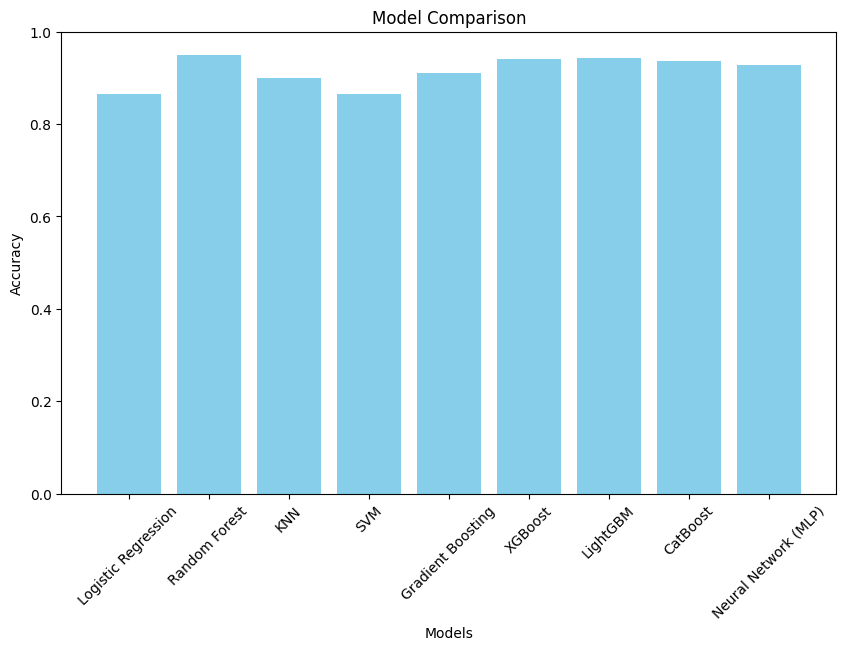

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Test Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


# Important Feature

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def normalize_importances(importances):
    scaler = MinMaxScaler()
    return scaler.fit_transform(importances.reshape(-1, 1)).flatten()

normalized_importances = {
    'Logistic Regression': normalize_importances(importance_lr),
    'Random Forest': normalize_importances(importance_rf),
    'KNN': normalize_importances(importance_knn),
    'SVM': normalize_importances(importance_svm),
    'Gradient Boosting': normalize_importances(importance_gb),
    'XGBoost': normalize_importances(importance_xgb),
    'LightGBM': normalize_importances(importance_lgb),
    'CatBoost': normalize_importances(importance_cb),
    'Neural Network (MLP)': normalize_importances(importance_mlp)


}

normalized_importances_df = pd.DataFrame(normalized_importances, index=feature_names)
normalized_importances_df['Mean Importance'] = normalized_importances_df.mean(axis=1)
ranked_features = normalized_importances_df.sort_values(by='Mean Importance', ascending=False)
print(ranked_features[['Mean Importance']])

                                Mean Importance
num_external_links                     0.683885
num_internal_links                     0.661173
num_password_fields                    0.580848
num_meta_tags                          0.540401
num_scripts                            0.428654
url_length                             0.387216
num_images                             0.382620
num_special_chars                      0.380602
num_dots_in_url                        0.296862
num_style_tags                         0.215309
num_inputs                             0.207658
num_js_functions                       0.203524
num_hidden_fields                      0.201009
num_inline_styles                      0.194285
num_forms                              0.179925
has_escape_js                          0.172772
num_subdomains                         0.167166
suspicious_url                         0.148231
num_external_form_actions              0.145473
has_settimeout_js                      0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

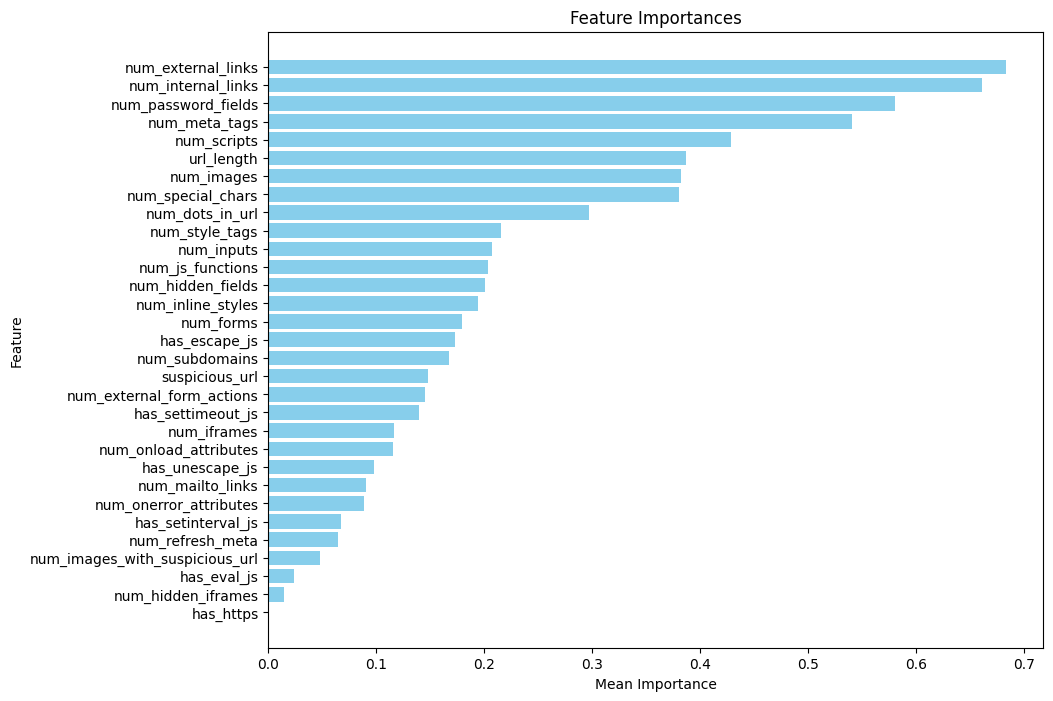

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(ranked_features.index, ranked_features['Mean Importance'], color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


#Testing

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from urllib.parse import urlparse

In [ ]:
def extract_features(soup, url):
    parsed_url = urlparse(url)
    filename = parsed_url.path.split('/')[-1] or 'index.html'
    features = {
        'url': url,
        'url_length': len(url),
        'num_dots_in_url': url.count('.'),
        'num_special_chars': len(re.findall(r'[@\-_=&]', url)),
        'num_subdomains': url.count('.') - 1,
        'num_forms': len(soup.find_all('form')),
        'num_inputs': len(soup.find_all('input')),
        'num_password_fields': len(soup.find_all('input', {'type': 'password'})),
        'num_external_links': len([link for link in soup.find_all('a', href=True) if urlparse(link['href']).netloc]),
        'num_internal_links': len([link for link in soup.find_all('a', href=True) if not urlparse(link['href']).netloc]),
        'num_hidden_fields': len(soup.find_all('input', {'type': 'hidden'})),
        'num_mailto_links': len(soup.find_all('a', href=re.compile(r'^mailto:'))),
        'num_scripts': len(soup.find_all('script')),
        'num_js_functions': sum([str(script).count('function') for script in soup.find_all('script')]),
        'has_eval_js': int(any('eval(' in str(script) for script in soup.find_all('script'))),
        'has_escape_js': int(any('escape(' in str(script) for script in soup.find_all('script'))),
        'has_unescape_js': int(any('unescape(' in str(script) for script in soup.find_all('script'))),
        'has_settimeout_js': int(any('setTimeout(' in str(script) for script in soup.find_all('script'))),
        'has_setinterval_js': int(any('setInterval(' in str(script) for script in soup.find_all('script'))),
        'has_https': int(url.startswith('https://')),
        'suspicious_url': int(any(keyword in url.lower() for keyword in ['login', 'bank', 'verify', 'secure', 'account'])),
        'num_meta_tags': len(soup.find_all('meta')),
        'num_refresh_meta': len(soup.find_all('meta', attrs={'http-equiv': 'refresh'})),
        'num_iframes': len(soup.find_all('iframe')),
        'num_hidden_iframes': len([iframe for iframe in soup.find_all('iframe') if iframe.get('style') == 'display:none']),
        'num_images': len(soup.find_all('img')),
        'num_images_with_suspicious_url': len([img for img in soup.find_all('img') if any(keyword in img.get('src', '').lower() for keyword in ['login', 'bank', 'verify', 'secure', 'account'])]),
        'num_style_tags': len(soup.find_all('style')),
        'num_inline_styles': len(soup.find_all(style=True)),
        'num_onload_attributes': len(soup.find_all(attrs={'onload': True})),
        'num_onerror_attributes': len(soup.find_all(attrs={'onerror': True})),
        'num_external_form_actions': len([form for form in soup.find_all('form') if urlparse(form.get('action', '')).netloc])
    }

    return features


In [ ]:
 #https://en.wikipedia.org/wiki/Web_scraping

In [ ]:
url= input("Enter a URL: ")
data = []

try:
  response = requests.get(url)
  response.raise_for_status()
  soup = BeautifulSoup(response.content, 'html.parser')
  features = extract_features(soup, url)
  data.append(features)
  print(f"Processed URL: {url}")

except requests.exceptions.RequestException as e:
  print(f"Error fetching {url}: {e}")

test_df = pd.DataFrame(data)
test_df

Enter a URL: https://en.wikipedia.org/wiki/Web_scraping
Processed URL: https://en.wikipedia.org/wiki/Web_scraping


,url,url_length,num_dots_in_url,num_special_chars,num_subdomains,num_forms,num_inputs,num_password_fields,num_external_links,num_internal_links,...,num_refresh_meta,num_iframes,num_hidden_iframes,num_images,num_images_with_suspicious_url,num_style_tags,num_inline_styles,num_onload_attributes,num_onerror_attributes,num_external_form_actions
0,https://en.wikipedia.org/wiki/Web_scraping,42,2,1,1,1,9,0,100,316,...,0,0,0,8,1,5,9,0,0,0


In [ ]:
test_df_without_url = test_df.drop('url', axis=1)
test_df_without_url

,url_length,num_dots_in_url,num_special_chars,num_subdomains,num_forms,num_inputs,num_password_fields,num_external_links,num_internal_links,num_hidden_fields,...,num_refresh_meta,num_iframes,num_hidden_iframes,num_images,num_images_with_suspicious_url,num_style_tags,num_inline_styles,num_onload_attributes,num_onerror_attributes,num_external_form_actions
0,42,2,1,1,1,9,0,100,316,1,...,0,0,0,8,1,5,9,0,0,0


In [ ]:
text_url = scaler.transform(test_df_without_url)

NameError: name 'scaler' is not defined

In [ ]:
random_forest_prediction = rf.predict(text_url)
print("Random Forest Prediction:", random_forest_prediction)
catboost_prediction = cat_model.predict(text_url)
print("CatBoost Prediction:", catboost_prediction)
xgboost_prediction = xgb_model.predict(text_url)
print("XGBoost Prediction:", xgboost_prediction)
lightgbm_prediction = lgb_model.predict(text_url)
print("LightGBM Prediction:", lightgbm_prediction)


Random Forest Prediction: [0]
CatBoost Prediction: [0]
XGBoost Prediction: [0]
LightGBM Prediction: [0]
